In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

In [39]:
num_classes = 2  # Número de classes
batch_size = 5
epochs = 10

dataset_path = "./data"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

# Crie um gerador de dados para pré-processamento
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Divida os dados em treinamento e validação
)

# Carregue e pré-processe os dados
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Tamanho das imagens de entrada
    batch_size=batch_size,
    class_mode='categorical',  # Para classificação multiclasse
    subset='training'  # Use os dados de treinamento
)

validation_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use os dados de validação
)


Found 103 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [40]:
# Carregue o modelo pré-treinado ResNet50 sem a camada de classificação
base_model = ResNet50(weights='imagenet', include_top=False)

# Adicione camadas personalizadas para classificação
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Crie o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congele as camadas pré-treinadas
for layer in base_model.layers:
    layer.trainable = False

# Compile o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, None, None, 64)       16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, None, None, 64)       256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, None, None, 64)       0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, None, None, 512)      66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, None, None, 512)      2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, None, None, 512)      0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, None, None, 256)      590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, None, None, 256)      0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, None, None, 1024)     525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, None, None, 1024)     0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, None, None, 256)      262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, None, None, 1024)     4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, None, None, 1024)     0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, None, None, 1024)     0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, None, None, 512)      2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, None, None, 512)      2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [41]:
# Treine o modelo
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=1)

# Avalie o modelo
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Acurácia de validação: {test_acc}')

# Salve o modelo treinado
model.save('modelo_classes.h5')

Epoch 1/10
21/21 [==============================] - 22s 807ms/step - loss: 1.1445 - accuracy: 0.6019 - val_loss: 1.7828 - val_accuracy: 0.7059
Epoch 2/10
21/21 [==============================] - 15s 727ms/step - loss: 0.5728 - accuracy: 0.8058 - val_loss: 2.1660 - val_accuracy: 0.4118
Epoch 3/10
21/21 [==============================] - 15s 723ms/step - loss: 0.6160 - accuracy: 0.7476 - val_loss: 3.1812 - val_accuracy: 0.1176
Epoch 4/10
21/21 [==============================] - 15s 731ms/step - loss: 0.4983 - accuracy: 0.8447 - val_loss: 3.0684 - val_accuracy: 0.1176
Epoch 5/10
21/21 [==============================] - 16s 738ms/step - loss: 0.4016 - accuracy: 0.8544 - val_loss: 4.0369 - val_accuracy: 0.1176
Epoch 6/10
21/21 [==============================] - 15s 727ms/step - loss: 0.3460 - accuracy: 0.8350 - val_loss: 4.6121 - val_accuracy: 0.1176
Epoch 7/10
21/21 [==============================] - 22s 1s/step - loss: 0.4157 - accuracy: 0.7961 - val_loss: 5.6319 - val_accuracy: 0.0588
Ep

C:\Users\regin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


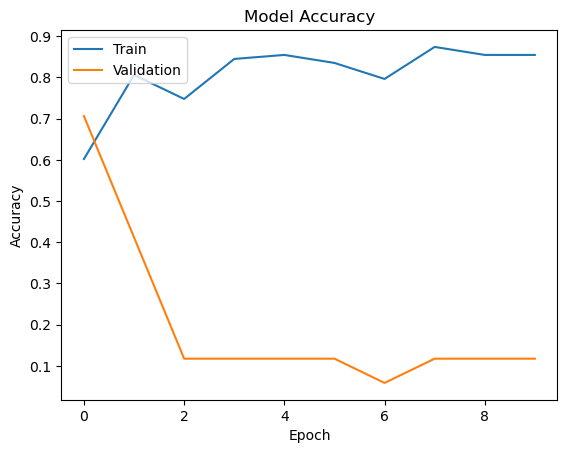

In [42]:
# Plotar as curvas de treinamento e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()